In [1]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=4531a362c82070e081253b274da1f7acb9f5760b3689b97d76f61dcf500a6a4e
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=e6093ea3dd6019ed5fe199eafdcfbc0a328ae6bdef13aabf5705ef5905f618ed
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [2]:
pip install pandas scipy

In [3]:
import requests
from scipy.io import arff
import pandas as pd

# Step 1: Download the ARFF file from GitHub
url = 'https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/main/dataset_31_credit-g.arff'
response = requests.get(url)

# Save the file locally
with open('dataset_31_credit-g.arff', 'wb') as f:
    f.write(response.content)

# Step 2: Load ARFF file
data = arff.loadarff('dataset_31_credit-g.arff')

# Step 3: Convert to a DataFrame
df = pd.DataFrame(data[0])

# Step 4: Decode byte strings to regular strings for object-type columns
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 5: Inspect the cleaned DataFrame
print(df.head())

  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

<ipython-input-3-69ee1a5f8bef>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [4]:
# Decode byte strings for each column individually using map
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Inspect the cleaned DataFrame
print(df.head())

  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

In [5]:
#Examine the dataset
print("#Rows: ",df.shape[0])
print("#Columns: ", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types of Each Column:\n", df.dtypes)

# Print the range of values per column
column_ranges = df.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df.isnull().sum())

#Rows:  1000
#Columns:  21

Column Names: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

Data Types of Each Column:
 checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_depe

In [6]:
# List of columns that need one-hot encoding
categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                       'employment', 'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

# Check the shape after encoding
print("New shape after encoding:", df_encoded.shape)

   duration  credit_amount  installment_commitment  residence_since   age  \
0       6.0         1169.0                     4.0              4.0  67.0   
1      48.0         5951.0                     2.0              2.0  22.0   
2      12.0         2096.0                     2.0              3.0  49.0   
3      42.0         7882.0                     2.0              4.0  45.0   
4      24.0         4870.0                     3.0              4.0  53.0   

   existing_credits  num_dependents  checking_status_<0  \
0               2.0             1.0                True   
1               1.0             1.0               False   
2               1.0             2.0               False   
3               1.0             2.0                True   
4               2.0             2.0                True   

   checking_status_>=200  checking_status_no checking  ...  \
0                  False                        False  ...   
1                  False                        False  ...

In [7]:
#Examine the dataset
print("#Rows: ",df_encoded.shape[0])
print("#Columns: ", df_encoded.shape[1])
print("\nColumn Names:", df_encoded.columns.tolist())
print("\nData Types of Each Column:\n", df_encoded.dtypes)

# Print the range of values per column
column_ranges = df_encoded.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df_encoded.isnull().sum())

#Rows:  1000
#Columns:  49

Column Names: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'checking_status_<0', 'checking_status_>=200', 'checking_status_no checking', 'credit_history_critical/other existing credit', 'credit_history_delayed previously', 'credit_history_existing paid', 'credit_history_no credits/all paid', 'purpose_domestic appliance', 'purpose_education', 'purpose_furniture/equipment', 'purpose_new car', 'purpose_other', 'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining', 'purpose_used car', 'savings_status_500<=X<1000', 'savings_status_<100', 'savings_status_>=1000', 'savings_status_no known savings', 'employment_4<=X<7', 'employment_<1', 'employment_>=7', 'employment_unemployed', 'personal_status_male div/sep', 'personal_status_male mar/wid', 'personal_status_male single', 'other_parties_guarantor', 'other_parties_none', 'property_magnitude_life insurance', 'property_magnitude_no known p

#Do a logistic regression to start things off and get an idea of each parameter's importance

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'class_good' is the target variable
X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.768
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        72
        True       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



#Extract and visualize the feature importance

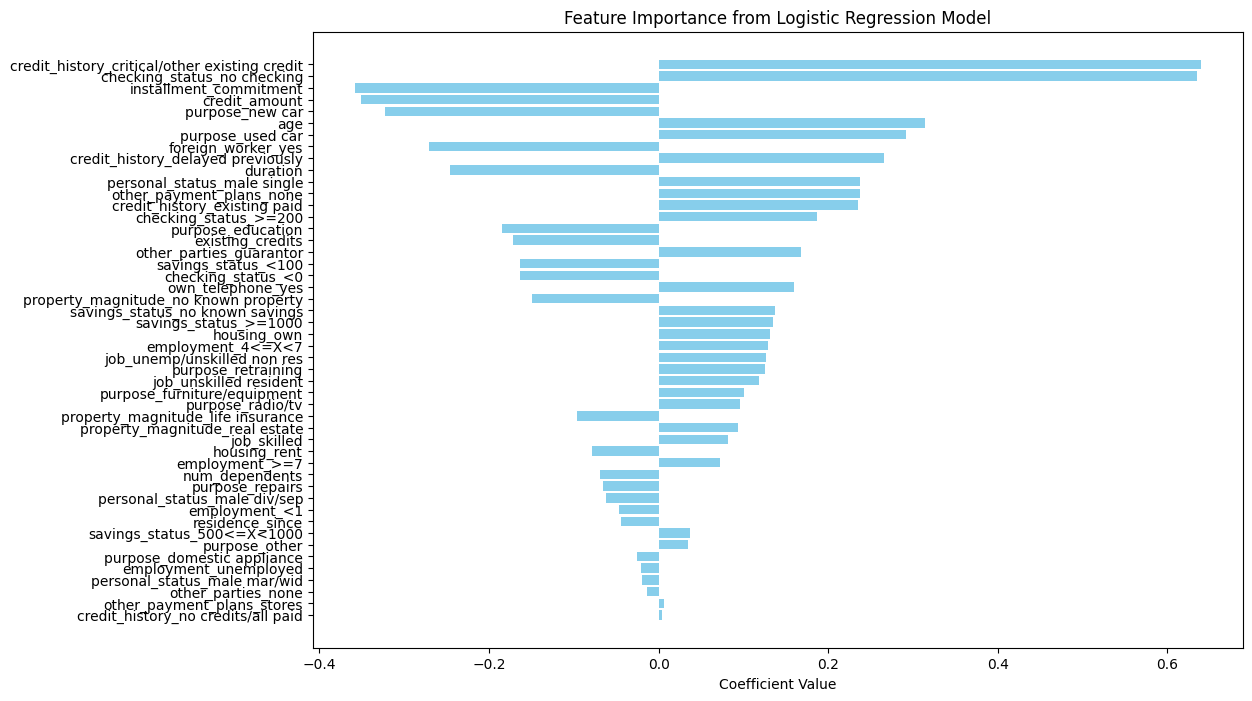

Top 10 Contributing Features:
                                          Feature  Absolute Coefficient
10  credit_history_critical/other existing credit              0.639236
9                     checking_status_no checking              0.635318
2                          installment_commitment              0.357931
1                                   credit_amount              0.351452
17                                purpose_new car              0.322782
4                                             age              0.314401
22                               purpose_used car              0.292301
47                             foreign_worker_yes              0.270891
11              credit_history_delayed previously              0.265540
0                                        duration              0.246469


In [9]:
import matplotlib.pyplot as plt

# Retrieve feature names
feature_names = X.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()  # To have the largest coefficients at the top
plt.show()

# Print the top 10 contributing features by absolute value of coefficients
top_10_features = feature_importance.head(10)
print("Top 10 Contributing Features:")
print(top_10_features[['Feature', 'Absolute Coefficient']])


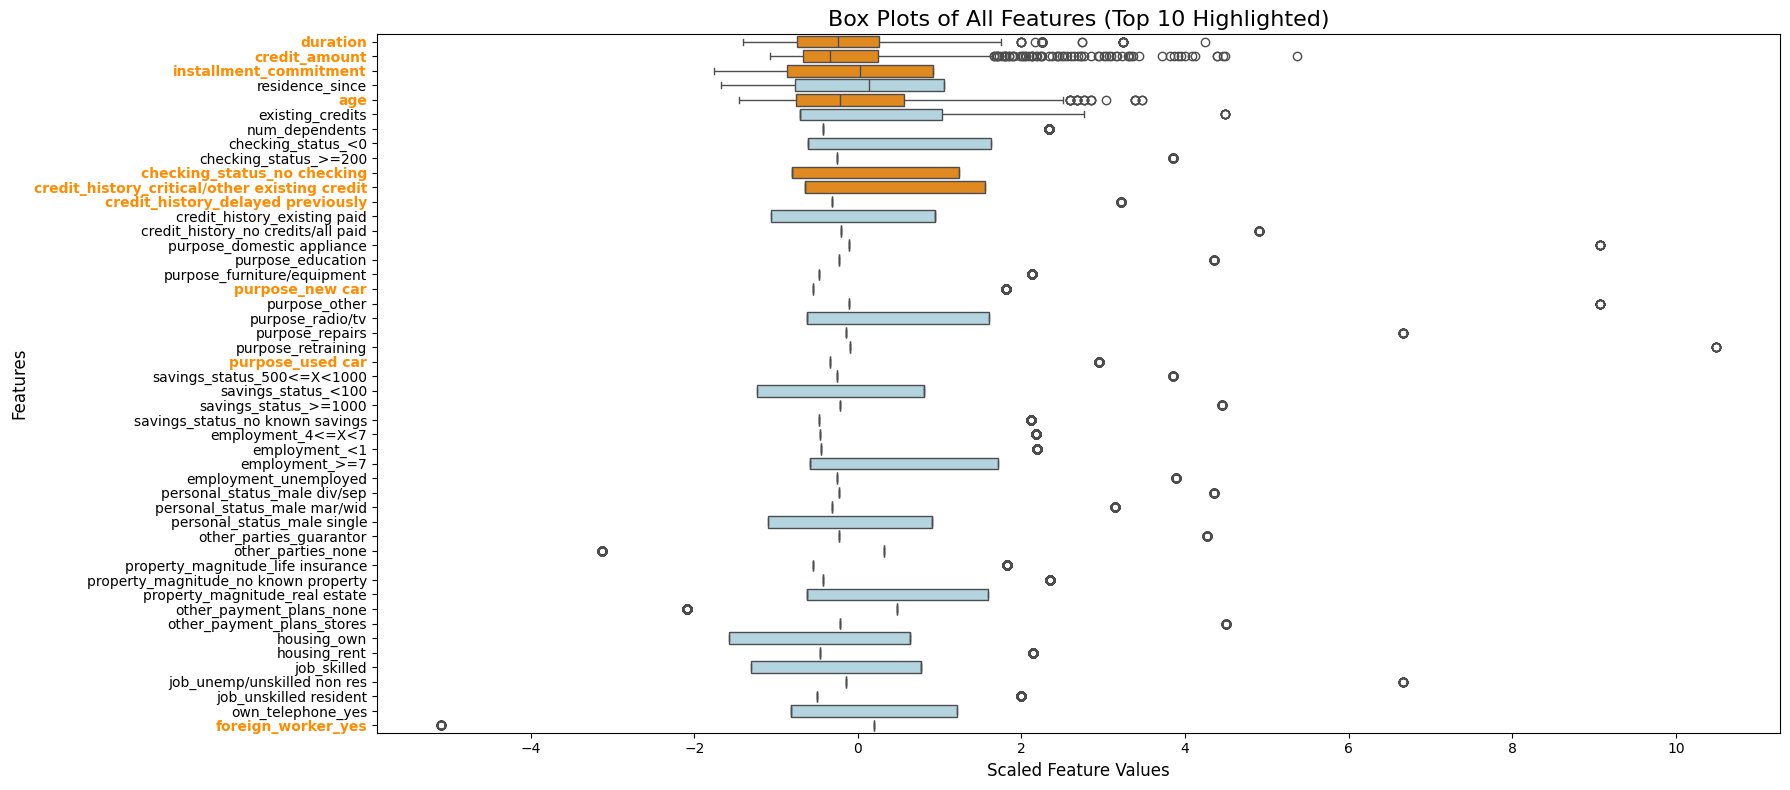

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the scaled features for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get the top 10 contributing features based on the absolute coefficient values
top_10_features = feature_importance.head(10)['Feature'].values

# Create a color palette where the top 10 features have a different color
colors = ['lightblue' if feature not in top_10_features else 'darkorange' for feature in X.columns]

# Set the size of the plot
plt.figure(figsize=(18, 8))

# Create box plots for all the features, highlighting the top 10 features
sns.boxplot(data=X_scaled_df, orient="h", palette=colors)

# Customize y-axis labels: bold and orange for top 10 features
ax = plt.gca()
for label in ax.get_yticklabels():
    if label.get_text() in top_10_features:
        label.set_fontweight('bold')  # Bold the label
        label.set_color('darkorange')  # Make it orange

# Add titles and labels
plt.title("Box Plots of All Features (Top 10 Highlighted)", fontsize=16)
plt.xlabel("Scaled Feature Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

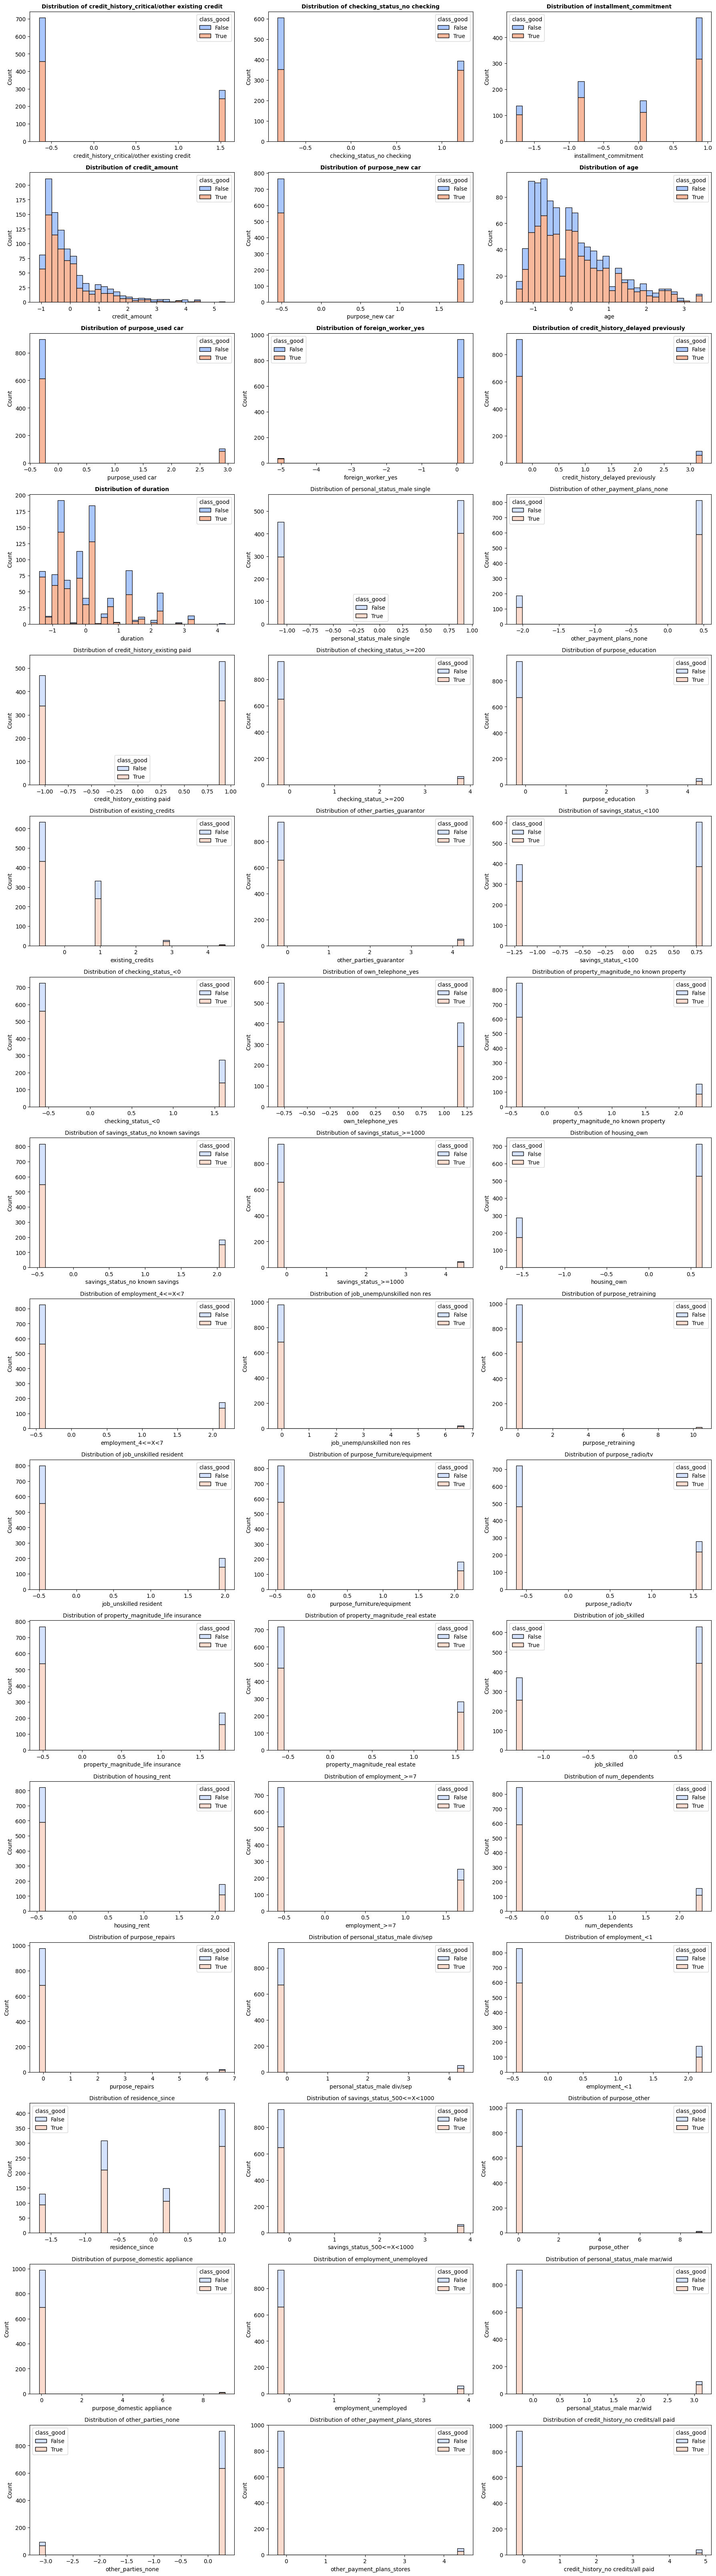

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features based on their absolute coefficient (feature importance)
sorted_features = feature_importance['Feature'].values

# Set up a grid of subplots
num_features = X_scaled_df.shape[1]
num_rows = (num_features // 3) + 1  # Assuming 3 plots per row

plt.figure(figsize=(18, num_rows * 4))

# Iterate through the sorted features and plot histograms
for i, feature in enumerate(sorted_features):
    plt.subplot(num_rows, 3, i + 1)

    # Combine the feature with class_good for easier plotting
    data = pd.concat([X_scaled_df[feature], y], axis=1)
    data.columns = [feature, 'class_good']

    # Determine transparency (alpha) for top 10 features
    alpha_value = 1 if i < 10 else 0.5  # Top 10 features will have alpha=1, others alpha=0.5

    # Plot a histogram with hue as 'class_good'
    sns.histplot(data=data, x=feature, hue='class_good', multiple='stack', palette='coolwarm', bins=30, alpha=alpha_value)

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10, fontweight='bold' if i < 10 else 'normal')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Assuming df_encoded has the 'credit_history_critical/other existing credit' and 'checking_status_no checking' columns

# Split 1: Datasets based on 'credit_history_critical/other existing credit'
dataset_credit_history_below_0_5 = df_encoded[df_encoded['credit_history_critical/other existing credit'] < 0.5]
dataset_credit_history_above_0_5 = df_encoded[df_encoded['credit_history_critical/other existing credit'] >= 0.5]

# Split 2: Datasets based on 'checking_status_no checking'
dataset_checking_status_below_0_5 = df_encoded[df_encoded['checking_status_no checking'] < 0.5]
dataset_checking_status_above_0_5 = df_encoded[df_encoded['checking_status_no checking'] >= 0.5]

# Display the shapes of the new datasets
print(f"Dataset (credit_history_critical < 0.5): {dataset_credit_history_below_0_5.shape}")
print(f"Dataset (credit_history_critical >= 0.5): {dataset_credit_history_above_0_5.shape}")
print(f"Dataset (checking_status_no checking < 0.5): {dataset_checking_status_below_0_5.shape}")
print(f"Dataset (checking_status_no checking >= 0.5): {dataset_checking_status_above_0_5.shape}")



Dataset (credit_history_critical < 0.5): (707, 49)
Dataset (credit_history_critical >= 0.5): (293, 49)
Dataset (checking_status_no checking < 0.5): (606, 49)
Dataset (checking_status_no checking >= 0.5): (394, 49)


#Focus on the most important feature and divide up the dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Function to perform logistic regression on a dataset with _1 suffix
def logistic_regression_on_dataset_1(X_1, y_1, dataset_name):
    # Standardize the features
    scaler_1 = StandardScaler()
    X_scaled_1 = scaler_1.fit_transform(X_1)

    # Split the data into training and test sets
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled_1, y_1, test_size=0.3, random_state=42)

    # Create and fit the logistic regression model
    model_1 = LogisticRegression(max_iter=1000)
    model_1.fit(X_train_1, y_train_1)

    # Make predictions
    y_pred_1 = model_1.predict(X_test_1)

    # Evaluate the model
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    report_1 = classification_report(y_test_1, y_pred_1)

    print(f"Logistic Regression on {dataset_name} (with _1 suffix):")
    print(f"Accuracy: {accuracy_1}")
    print(f"Classification Report:\n{report_1}")
    print("-" * 80)

# Assuming 'class_good_1' is the target variable in each dataset

# Logistic Regression on credit_history_critical < 0.5
X_1_1 = dataset_credit_history_below_0_5.drop('class_good', axis=1)
y_1_1 = dataset_credit_history_below_0_5['class_good']
logistic_regression_on_dataset_1(X_1_1, y_1_1, 'credit_history_critical < 0.5')

# Logistic Regression on credit_history_critical >= 0.5
X_2_1 = dataset_credit_history_above_0_5.drop('class_good', axis=1)
y_2_1 = dataset_credit_history_above_0_5['class_good']
logistic_regression_on_dataset_1(X_2_1, y_2_1, 'credit_history_critical >= 0.5')

# Logistic Regression on checking_status_no checking < 0.5
X_3_1 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_3_1 = dataset_checking_status_below_0_5['class_good']
logistic_regression_on_dataset_1(X_3_1, y_3_1, 'checking_status_no checking < 0.5')

# Logistic Regression on checking_status_no checking >= 0.5
X_4_1 = dataset_checking_status_above_0_5.drop('class_good', axis=1)
y_4_1 = dataset_checking_status_above_0_5['class_good']
logistic_regression_on_dataset_1(X_4_1, y_4_1, 'checking_status_no checking >= 0.5')



Logistic Regression on credit_history_critical < 0.5 (with _1 suffix):
Accuracy: 0.7323943661971831
Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.59      0.62        78
        True       0.77      0.81      0.79       135

    accuracy                           0.73       213
   macro avg       0.71      0.70      0.71       213
weighted avg       0.73      0.73      0.73       213

--------------------------------------------------------------------------------
Logistic Regression on credit_history_critical >= 0.5 (with _1 suffix):
Accuracy: 0.7613636363636364
Classification Report:
              precision    recall  f1-score   support

       False       0.29      0.27      0.28        15
        True       0.85      0.86      0.86        73

    accuracy                           0.76        88
   macro avg       0.57      0.56      0.57        88
weighted avg       0.75      0.76      0.76        88

------------------

#Let's keep "checking_status_no checking >= 0.5" as we have 89% accuracy and focus on chopping up the "checking_status_no checking < 0.5" portion and improving the 62% accuracy

In [14]:
import pandas as pd

# Prepare the dataset where checking_status_no checking < 0.5 with '_1' suffix
X_checking_below_0_5_1 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_checking_below_0_5_1 = dataset_checking_status_below_0_5['class_good']

# Standardize the features
scaler_checking_below_0_5_1 = StandardScaler()
X_scaled_checking_below_0_5_1 = scaler_checking_below_0_5_1.fit_transform(X_checking_below_0_5_1)

# Split the dataset into training and test sets
X_train_checking_below_0_5_1, X_test_checking_below_0_5_1, y_train_checking_below_0_5_1, y_test_checking_below_0_5_1 = train_test_split(
    X_scaled_checking_below_0_5_1, y_checking_below_0_5_1, test_size=0.25, random_state=42)

# Initialize and train the Logistic Regression model
model_checking_below_0_5_1 = LogisticRegression(max_iter=2000)
model_checking_below_0_5_1.fit(X_train_checking_below_0_5_1, y_train_checking_below_0_5_1)

# Get feature importances
coefficients = model_checking_below_0_5_1.coef_[0]
features = X_checking_below_0_5_1.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                                          Feature  Coefficient
10  credit_history_critical/other existing credit     0.798526
11              credit_history_delayed previously     0.492248
12                   credit_history_existing paid     0.462199
26                savings_status_no known savings     0.352533
34                        other_parties_guarantor     0.324013
27                              employment_4<=X<7     0.305082
8                           checking_status_>=200     0.263571
33                    personal_status_male single     0.257179
21                             purpose_retraining     0.243369
25                          savings_status_>=1000     0.225395
38                 property_magnitude_real estate     0.108537
29                                 employment_>=7     0.075114
39                       other_payment_plans_none     0.068886
46                              own_telephone_yes     0.067089
28                                  employment_<1     0

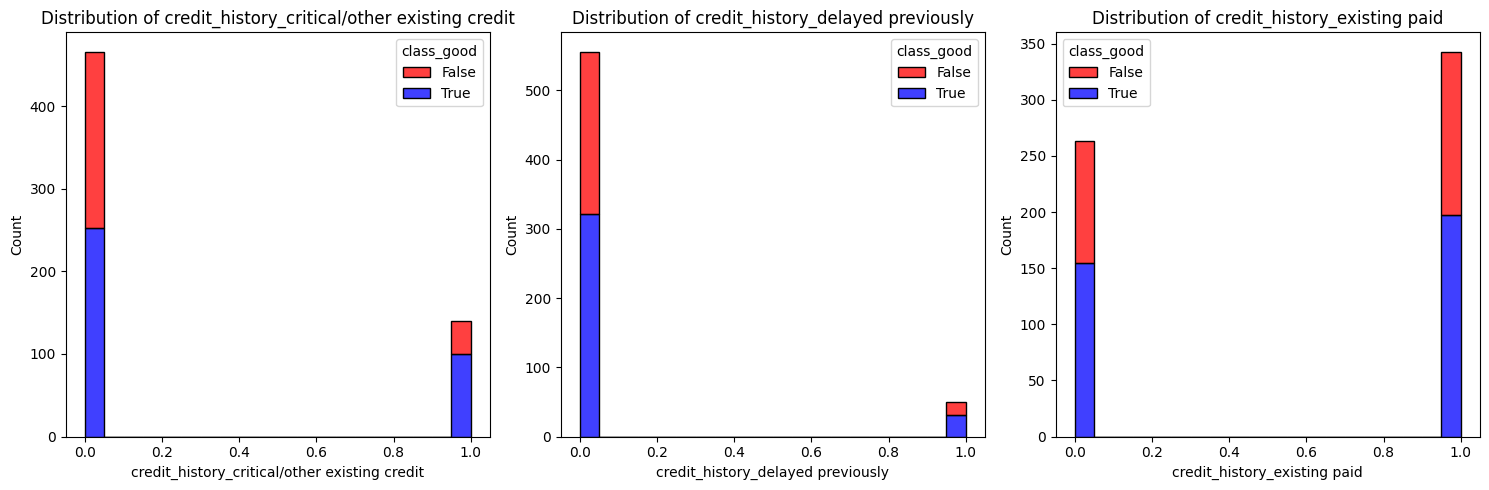

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['credit_history_critical/other existing credit',
             'credit_history_delayed previously',
             'credit_history_existing paid']

# Set up the plot
plt.figure(figsize=(15, 5))

# Iterate through each feature and plot its distribution
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)

    # Combine the feature with the class_good for easier plotting
    data = pd.concat([dataset_checking_status_below_0_5[feature], dataset_checking_status_below_0_5['class_good']], axis=1)
    data.columns = [feature, 'class_good']

    # Plot the distribution of the feature values for each class
    sns.histplot(data=data, x=feature, hue='class_good', multiple='stack', palette={True: 'blue', False: 'red'}, bins=20)

    # Set titles and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

#Now within the "checking_status_no checking < 0.5", we can see that "credit_history_delayed previously" has most of the samples in the false category and they're evenly distributed.  Let's focus on that portion.

In [16]:
# Assuming 'dataset_checking_status_below_0_5' is the DataFrame you want to work with

# Create datasets based on 'credit_history_delayed previously' condition
dataset_credit_delayed_above_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_delayed previously'] > 0.5]
dataset_credit_delayed_below_or_equal_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_delayed previously'] <= 0.5]

# Display the shapes of the new datasets
print("Dataset with 'credit_history_delayed previously' > 0.5 shape:", dataset_credit_delayed_above_0_5.shape)
print("Dataset with 'credit_history_delayed previously' <= 0.5 shape:", dataset_credit_delayed_below_or_equal_0_5.shape)

# Drop the column "checking_status_no checking" from each dataset
dataset_credit_delayed_above_0_5__48 = dataset_credit_delayed_above_0_5.drop(columns=['checking_status_no checking'])
dataset_credit_delayed_below_or_equal_0_5__48 = dataset_credit_delayed_below_or_equal_0_5.drop(columns=['checking_status_no checking'])

# Display the shapes of the updated datasets
print("Updated dataset with 'credit_history_delayed previously' > 0.5 shape:", dataset_credit_delayed_above_0_5__48.shape)
print("Updated dataset with 'credit_history_delayed previously' <= 0.5 shape:", dataset_credit_delayed_below_or_equal_0_5__48.shape)



Dataset with 'credit_history_delayed previously' > 0.5 shape: (50, 49)
Dataset with 'credit_history_delayed previously' <= 0.5 shape: (556, 49)
Updated dataset with 'credit_history_delayed previously' > 0.5 shape: (50, 48)
Updated dataset with 'credit_history_delayed previously' <= 0.5 shape: (556, 48)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Prepare datasets for logistic regression
datasets = {
    'credit_delayed_above_0_5': dataset_credit_delayed_above_0_5__48,
    'credit_delayed_below_or_equal_0_5': dataset_credit_delayed_below_or_equal_0_5__48
}

for key, dataset in datasets.items():
    # Separate features and target variable
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"Logistic Regression on dataset {key}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Logistic Regression on dataset credit_delayed_above_0_5:
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.89      0.73      0.80        11

    accuracy                           0.73        15
   macro avg       0.69      0.74      0.70        15
weighted avg       0.79      0.73      0.75        15



Logistic Regression on dataset credit_delayed_below_or_equal_0_5:
Accuracy: 0.6586826347305389
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        71
        True       0.68      0.77      0.72        96

    accuracy                           0.66       167
   macro avg       0.65      0.64      0.64       167
weighted avg       0.65      0.66      0.65       167





#Let's get the most we can out of "credit_delayed_above_0_5" and investigate 4 popular ML techniques:
-Decision Tree

-Logistic Regression

-Kmeans clustering

-SVM

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Split features and target
X = dataset_credit_delayed_above_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_above_0_5__48['class_good']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store metrics for each model
metrics = {}

# 1. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

metrics['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_tree),
    'classification_report': classification_report(y_test, y_pred_tree)
}

# 2. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

metrics['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'classification_report': classification_report(y_test, y_pred_log_reg)
}

# 3. K-Means Clustering (unsupervised, using clusters as "predictions")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Map the clusters to the target labels for evaluation
# This assumes the clusters might map closely to 'class_good' (use cluster 0/1 for simplicity)
metrics['K-Means'] = {
    'accuracy': accuracy_score(y_test, y_pred_kmeans),
    'classification_report': classification_report(y_test, y_pred_kmeans)
}

# 4. SVM (Support Vector Machine)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

metrics['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm)
}

# Print the evaluation metrics for each model
for model_name, metric in metrics.items():
    print(f"Model: {model_name}")
    print("Accuracy:", metric['accuracy'])
    print("Classification Report:\n", metric['classification_report'])
    print("\n")

Model: Decision Tree
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

       False       0.40      0.50      0.44         4
        True       0.80      0.73      0.76        11

    accuracy                           0.67        15
   macro avg       0.60      0.61      0.60        15
weighted avg       0.69      0.67      0.68        15



Model: Logistic Regression
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.89      0.73      0.80        11

    accuracy                           0.73        15
   macro avg       0.69      0.74      0.70        15
weighted avg       0.79      0.73      0.75        15



Model: K-Means
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

       False       0.17      0.50      0.25         4
        True       0.33   

#OK so we'll stick with Logistic Regression, let's try these 4 on the larger dataset: "credit_delayed_below_or_equal_0_5"

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset
# dataset_credit_delayed_below_or_equal_0_5__48 = pd.read_csv('path_to_your_dataset.csv')

# Split features and target
X = dataset_credit_delayed_below_or_equal_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_below_or_equal_0_5__48['class_good']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store metrics for each model
metrics = {}

# 1. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

metrics['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_tree),
    'classification_report': classification_report(y_test, y_pred_tree)
}

# 2. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

metrics['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'classification_report': classification_report(y_test, y_pred_log_reg)
}

# 3. K-Means Clustering (unsupervised, using clusters as "predictions")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Map the clusters to the target labels for evaluation
metrics['K-Means'] = {
    'accuracy': accuracy_score(y_test, y_pred_kmeans),
    'classification_report': classification_report(y_test, y_pred_kmeans)
}

# 4. SVM (Support Vector Machine)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

metrics['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm)
}

# Print the evaluation metrics for each model
for model_name, metric in metrics.items():
    print(f"Model: {model_name}")
    print("Accuracy:", metric['accuracy'])
    print("Classification Report:\n", metric['classification_report'])
    print("\n")


Model: Decision Tree
Accuracy: 0.5808383233532934
Classification Report:
               precision    recall  f1-score   support

       False       0.51      0.52      0.51        71
        True       0.64      0.62      0.63        96

    accuracy                           0.58       167
   macro avg       0.57      0.57      0.57       167
weighted avg       0.58      0.58      0.58       167



Model: Logistic Regression
Accuracy: 0.6646706586826348
Classification Report:
               precision    recall  f1-score   support

       False       0.63      0.52      0.57        71
        True       0.69      0.77      0.73        96

    accuracy                           0.66       167
   macro avg       0.66      0.65      0.65       167
weighted avg       0.66      0.66      0.66       167



Model: K-Means
Accuracy: 0.49700598802395207
Classification Report:
               precision    recall  f1-score   support

       False       0.46      0.96      0.62        71
        Tr

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with best parameters
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Print classification report
print("Classification Report for Best SVM Model:\n", classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

#That's not much help at 66%, so let's try a diffent ML model on that dataset only.

Decision Tree Accuracy (max_depth=6): 0.6115107913669064
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.57      0.48      0.52        61
        True       0.64      0.72      0.67        78

    accuracy                           0.61       139
   macro avg       0.60      0.60      0.60       139
weighted avg       0.61      0.61      0.61       139



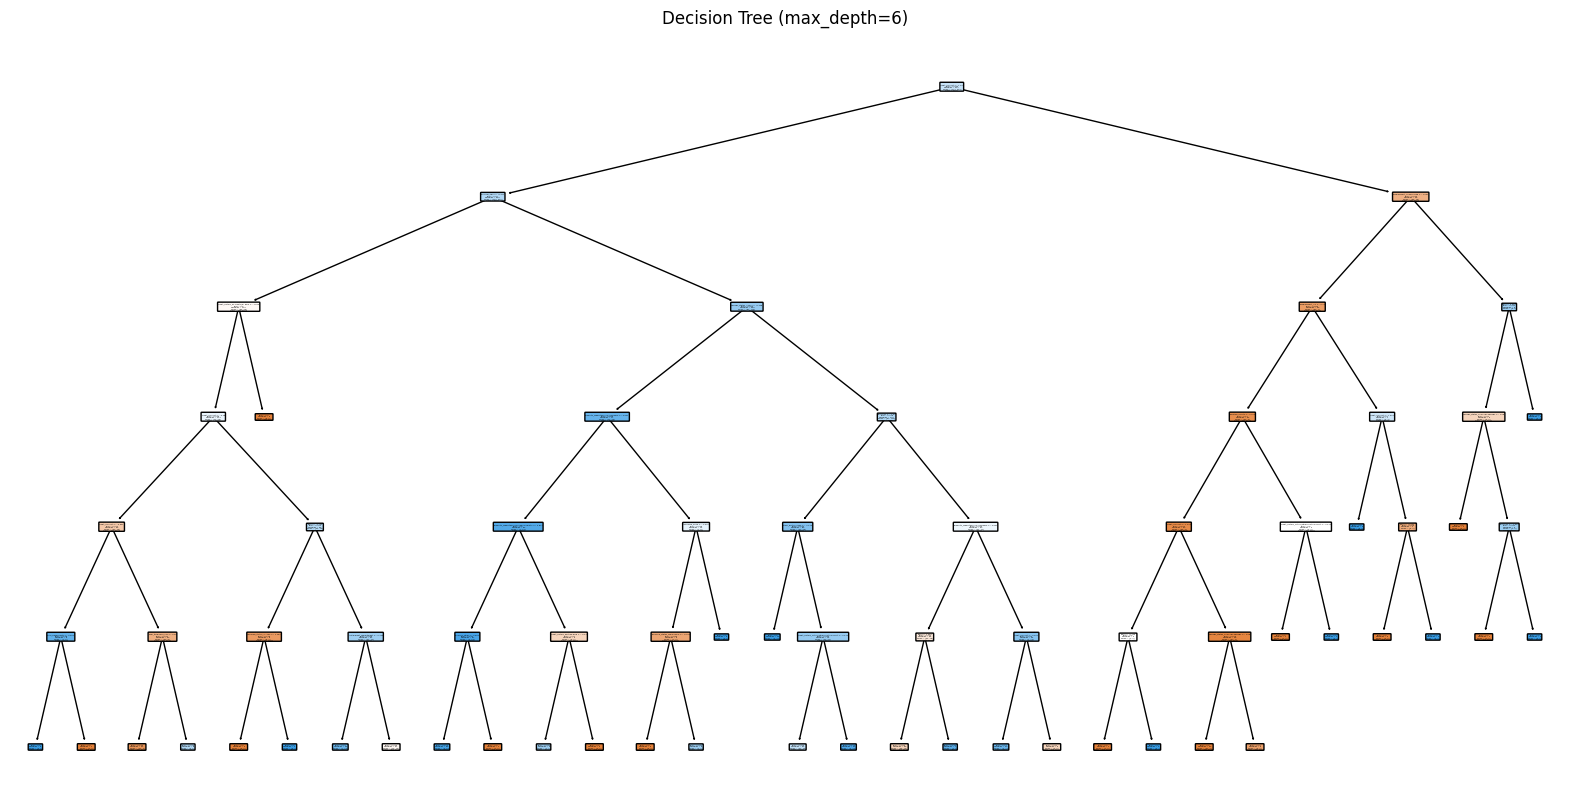

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the dataset
X = dataset_credit_delayed_below_or_equal_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_below_or_equal_0_5__48['class_good']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Set the maximum depth of the decision tree
max_depth = 6  # You can change this value to control the depth

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print(f"Decision Tree Accuracy (max_depth={max_depth}):", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Good', 'Good'], rounded=True)
plt.title(f"Decision Tree (max_depth={max_depth})")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare datasets for logistic regression
datasets = {
    'credit_delayed_below_or_equal_0_5': dataset_credit_delayed_below_or_equal_0_5
}

for key, dataset in datasets.items():
    # Separate features and target variable
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Extract feature names and coefficients
    feature_names = X.columns
    coefficients = model.coef_[0]

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Print feature importance
    print(f"Feature Importance for dataset {key}:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance for {key}')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the dataset where checking_status_no checking < 0.5
X_checking_below_0_5 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_checking_below_0_5 = dataset_checking_status_below_0_5['class_good']

# Standardize the features
scaler_checking_below_0_5 = StandardScaler()
X_scaled_checking_below_0_5 = scaler_checking_below_0_5.fit_transform(X_checking_below_0_5)

# Split the dataset into training and test sets
X_train_checking_below_0_5, X_test_checking_below_0_5, y_train_checking_below_0_5, y_test_checking_below_0_5 = train_test_split(
    X_scaled_checking_below_0_5, y_checking_below_0_5, test_size=0.25, random_state=42)

# Set the maximum depth of the decision tree
max_depth = 5  # You can change this value to control tree depth

# Initialize and train the Decision Tree model with max_depth parameter
model_checking_below_0_5 = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
model_checking_below_0_5.fit(X_train_checking_below_0_5, y_train_checking_below_0_5)

# Make predictions
y_pred_checking_below_0_5 = model_checking_below_0_5.predict(X_test_checking_below_0_5)

# Evaluation metrics
print(f"Decision Tree Accuracy (max_depth={max_depth}):", accuracy_score(y_test_checking_below_0_5, y_pred_checking_below_0_5))
print("Decision Tree Classification Report:\n", classification_report(y_test_checking_below_0_5, y_pred_checking_below_0_5))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model_checking_below_0_5, filled=True, feature_names=X_checking_below_0_5.columns, class_names=['Not Good', 'Good'], rounded=True)
plt.title(f"Decision Tree for checking_status_no checking < 0.5 (max_depth={max_depth})")
plt.show()
